### Exploratory Data Analysis (EDA)

In this section, we will conduct exploratory data analysis (EDA) to gain a deeper understanding of the characteristics and behaviors of the customers. The goal is to identify relevant patterns, detect potential anomalies, and understand the distribution of the selected variables for segmentation. Additionally, the relationships between variables will be analyzed through visualizations and statistical metrics that will allow us to make informed decisions for the next stage of the process: customer segmentation.

The key variables to analyze include the number of clicks `n_clicks`, the number of visits `n_visitas`, the purchase amount `monto_compras`, the discount amount `monto_descuentos`, the time since the first purchase `dias_primera_compra`, and the customer profile `info_perfil`.

In [73]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Util functions
def hist(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="hist")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

def box(df, column):
    plt.figure(figsize=(6, 4))
    df[column].plot(kind="box")
    plt.title("Distribution of "+column)
    plt.ylabel("Values")
    plt.show()

In [75]:
# Loading cleaned dataset
dataset_path = "../data/processed/cleaned_dataset.csv"
df = pd.read_csv(dataset_path)
df = df.drop(columns=["ID"])

#### Univariate Analysis

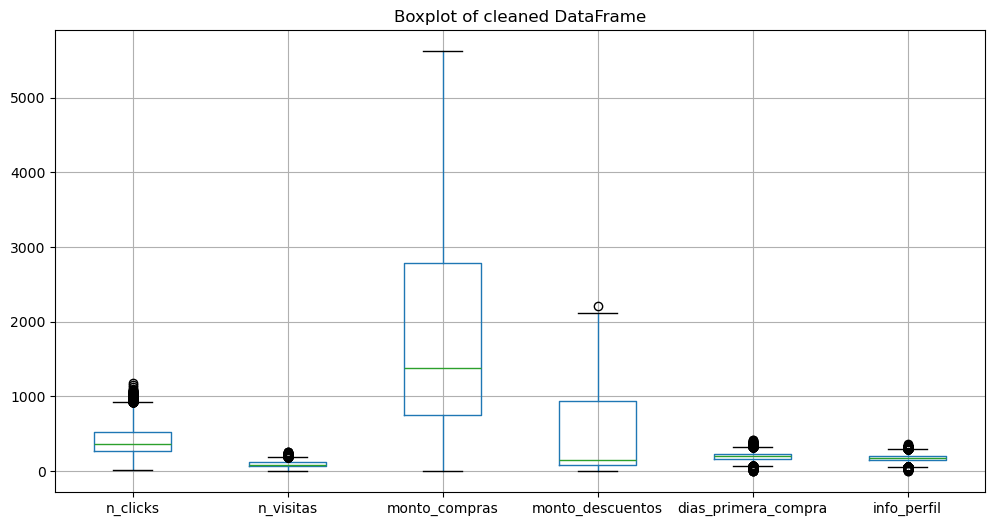

In [76]:
# Viewing the distributions of all columns cleaned
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of cleaned DataFrame")
plt.show()

Visualizing the new distributions of the numeric columns after data cleaning confirms that there are no longer any anomalous records with negative values, as none of these distributions show a lower whisker or a value below the origin.

Furthermore, it can be established that none of the distributions have been significantly affected, as they still retain their original structures. It is worth noting that the current presence of outliers is due to the decision to preserve these values, as they may contain valuable information due to their representative size.

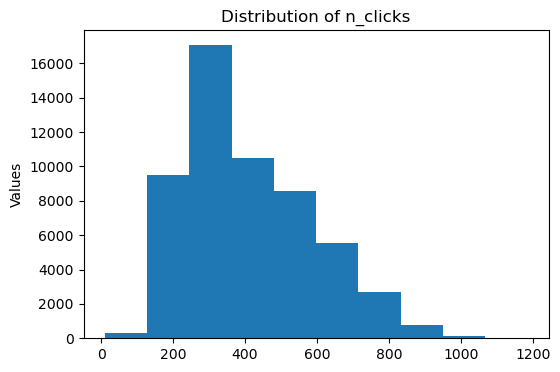

In [77]:
# Viewing distribution of n_clicks
hist(df, 'n_clicks')

The distribution of the `n_clicks` column is asymmetric and skewed to the right. According to its graph, it can be determined that a large portion of customers are highly interested in frequently checking updates on the store's products. They typically make approximately between 200 and 600 clicks. This could represent an average behavior for them.

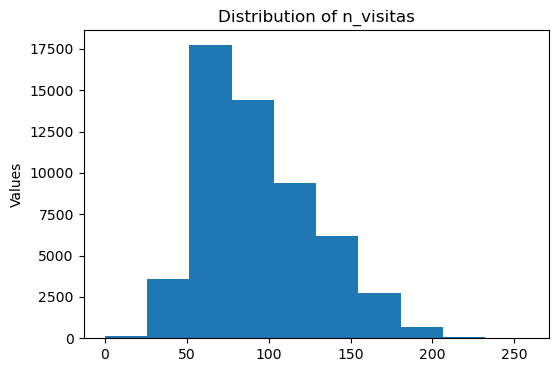

In [78]:
# Viewing distribution of n_visitas
hist(df, 'n_visitas')

The distribution of the `n_visitas` column is similar to that of the `n_clicks` column; it is asymmetric and skewed to the right. Based on its graph, it can be established that most customers show a high interest in frequently visiting the online store. They typically make approximately between 50 and 150 visits, which could symbolize an average characteristic for them.

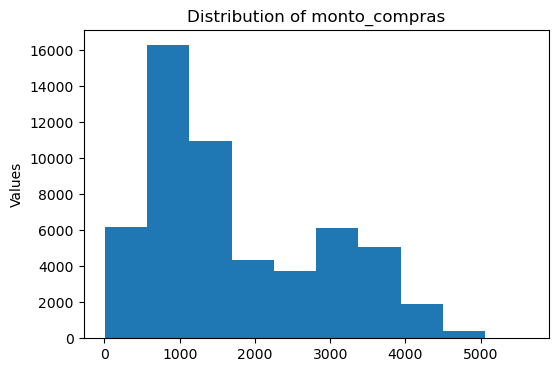

In [79]:
# Viewing distribution of monto_compras
hist(df, 'monto_compras')

The distribution of the `monto_compras` column is asymmetric and skewed to the right. However, it is not a very uniform distribution. According to its graph, it is possible to identify two large dispersed groups representing the majority of customers. The first group spends between $0 and $1500, while the second group spends between $3000 and $4000 on purchases. This allows for the identification of regular buyers with higher purchasing power compared to others.

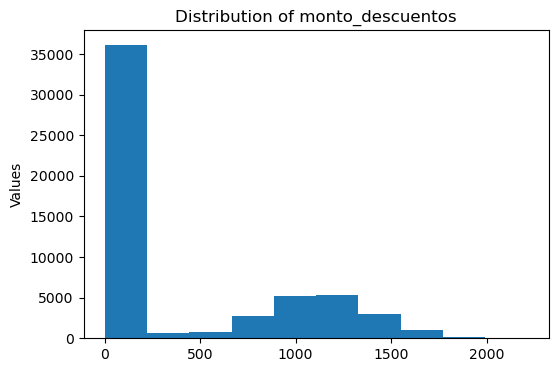

In [80]:
# Viewing distribution of monto_descuentos
hist(df, 'monto_descuentos')

The distribution of the `monto_descuentos` column is asymmetric and skewed to the right. However, it is not a uniform distribution at all. Based on its graph, it can be determined that, similar to the `monto_compras` column, it presents two large dispersed groups. The first group has a total discount ranging between 0% and 200%, while the second group has a total discount ranging between 600% and 1400%. This could be related to regular customers who are relatively new to the online store compared to those who have been there for a longer time.

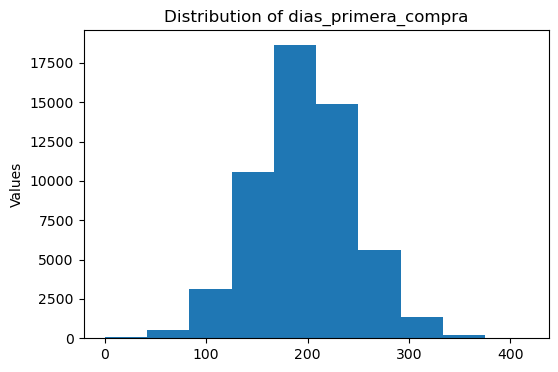

In [81]:
# Viewing distribution of dias_primera_compra
hist(df, 'dias_primera_compra')

The distribution of the `dias_primera_compra` column is symmetrical and resembles a normal distribution. According to its graph, it can be established that most customers have been regular clients of the online store for quite some time, as approximately between 120 and 240 days have passed since their first purchase. In contrast, very few new and long-standing customers are part of the store.

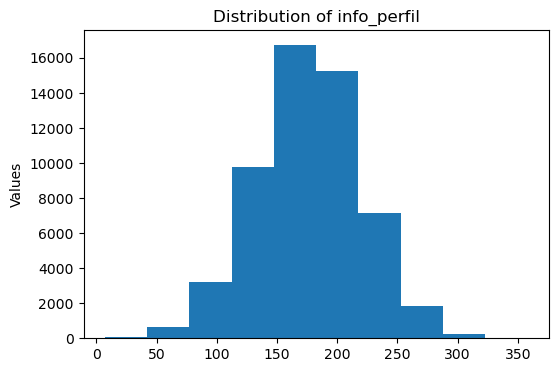

In [82]:
# Viewing distribution of info_perfil
hist(df, 'info_perfil')

The distribution of the `info_perfil` column is similar to that of the dias_primera_compra column; it is symmetrical and resembles a normal distribution. Based on its graph, it can be noted that most customers have a score between 105 and 245 points. This could represent an average behavior for them.

#### Multivariate Analysis

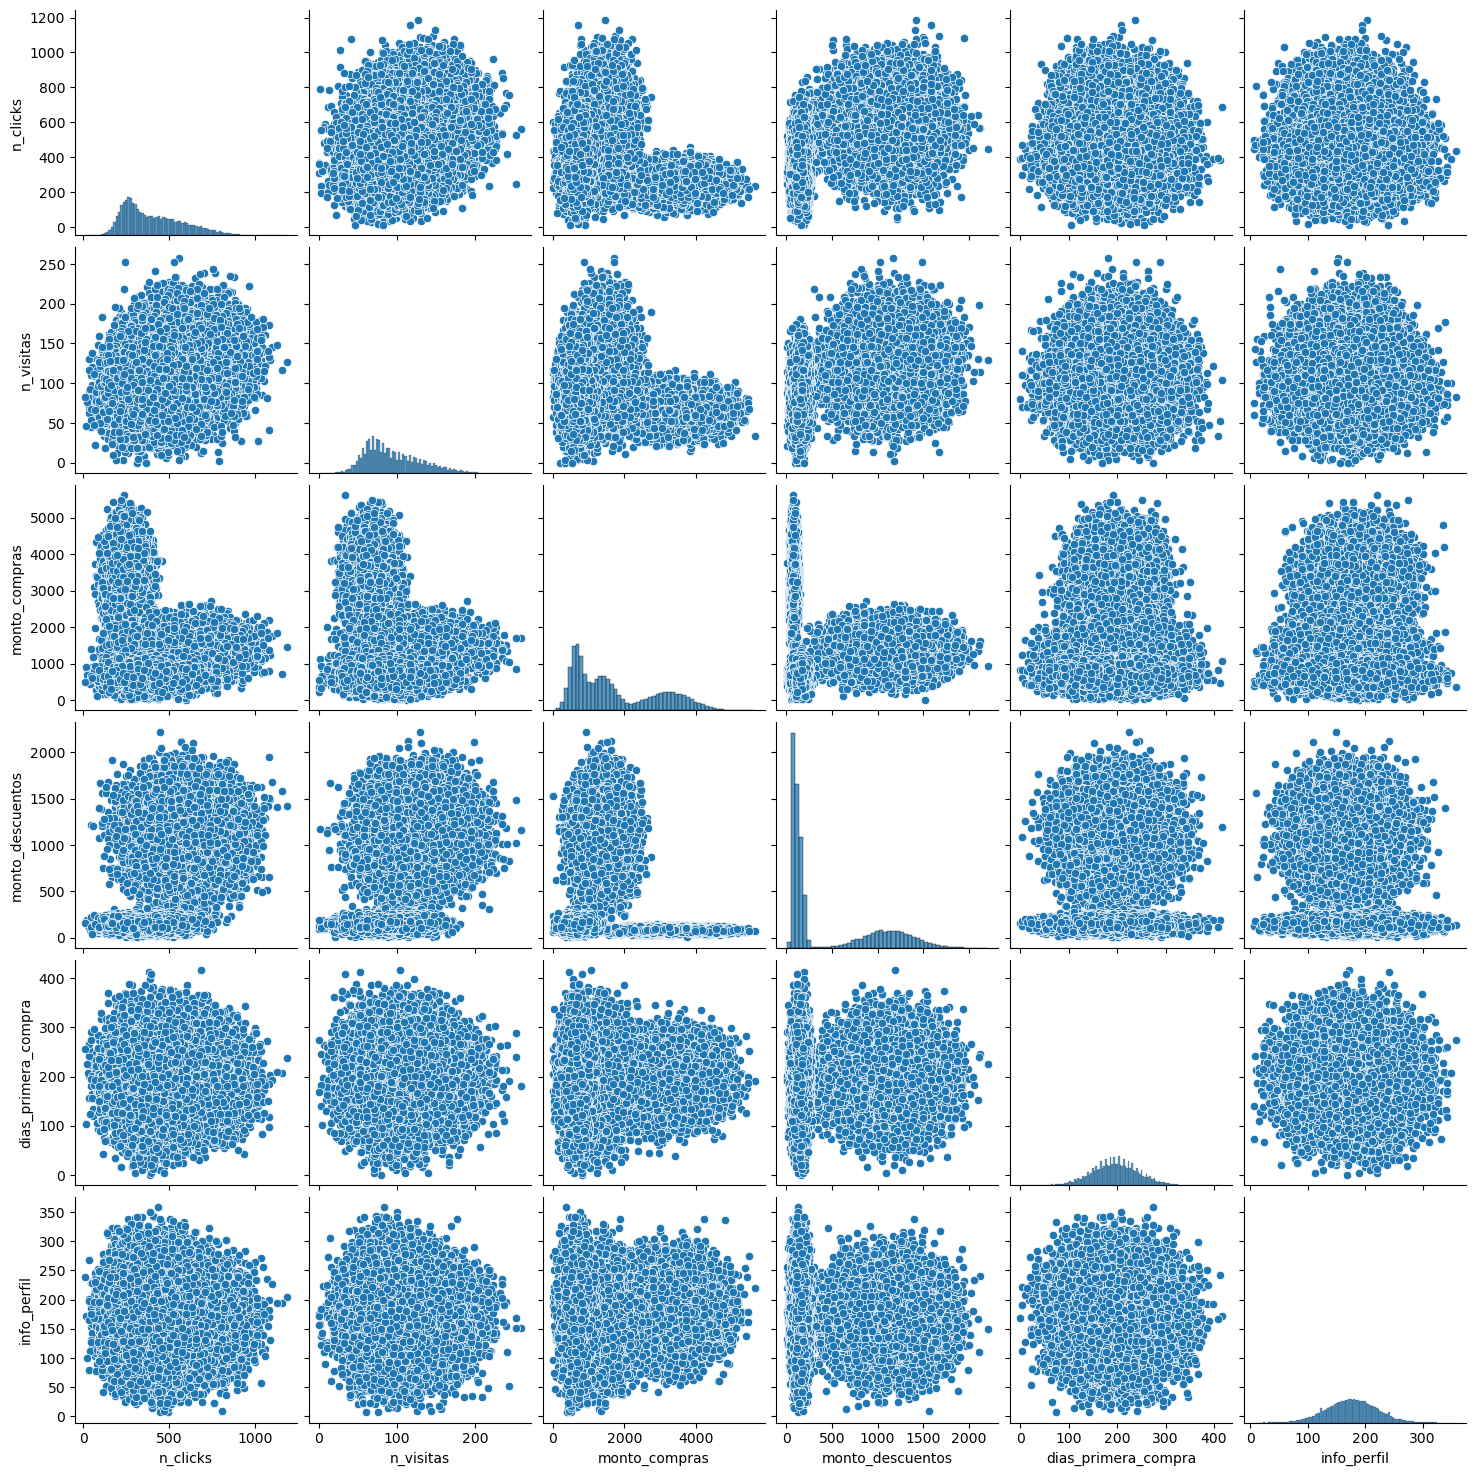

In [83]:
sns.pairplot(df)

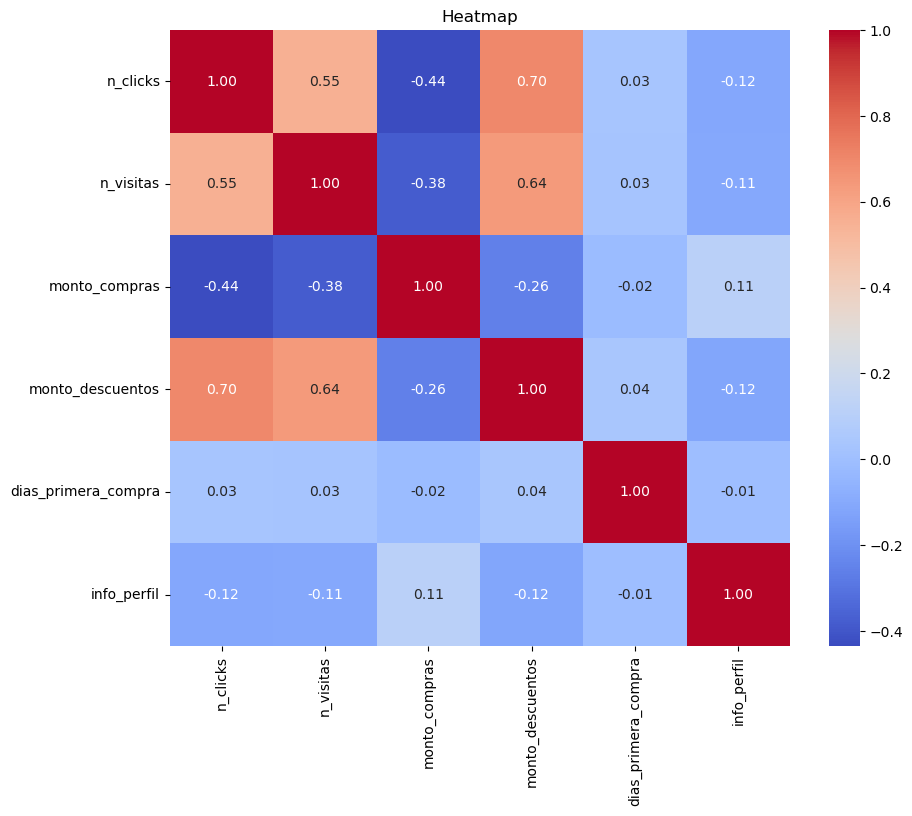

In [84]:
# Viewing correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap")
plt.show()

Based on the charts and observing this matrix of correlation coefficients between different pairs of columns, it is possible to identify some direct and inverse relationships worth studying. For this analysis, we will consider weak to perfect relationships, i.e., all relationships between column pairs with a correlation coefficient between -1.00 and -0.20 or 0.20 and 1.00.

#### Strong Relationships

These column pairs have a strong and direct relationship since their correlation coefficients are positive and fall between 0.60 and 0.80. This means that if one increases or decreases, the other does as well.

- **monto_descuentos vs n_clicks:** These columns have a relatively high correlation coefficient of 0.70. According to the business logic, it could be concluded that the online store has a discount program that does not necessarily reward customers who buy or spend more but rather those who frequently check for new product updates.

- **monto_descuentos vs n_visitas:** These columns have a high correlation coefficient of 0.64. They are in the same situation as the previous pair of columns. Thus, it can be established that the online store’s discount program rewards customers who regularly visit the store rather than those who spend or purchase more.

#### Moderate Relationships

These column pairs have a moderate relationship since their correlation coefficients are positive or negative and fall between -0.80 and -0.40 or 0.40 and 0.60.

- **n_visitas vs n_clicks:** These columns have a moderately high correlation coefficient of 0.55. This implies a direct relationship. However, this situation was expected since, according to business logic, it is normal for these columns to be somewhat related.

- **monto_compras vs n_clicks:** These columns have a moderate correlation coefficient of -0.44. This suggests an inverse relationship. This is somewhat surprising, as it implies that customers who pay more attention to product updates are the ones who make fewer purchases, whereas those who check the online store less frequently are the ones who buy more.

#### Weak Relationships

These column pairs have a weak and inverse relationship since their correlation coefficients are negative and fall between -0.40 and -0.20. This means that if one increases, the other decreases, and vice versa.

- **monto_compras vs n_visitas:** These columns have a relatively normal correlation coefficient of -0.38. This situation is quite similar to the previous pair of columns and was expected, as the columns `n_visitas` and `n_clicks` have a direct relationship. Therefore, the relationship between `monto_compras` and `n_visitas` would exhibit a similar behavior.

- **monto_descuentos vs monto_compras:** These columns have a low correlation coefficient of -0.24. This situation is somewhat surprising, as one would normally think that a higher number of purchases would lead to more discounts. However, it seems that within the online store, this is not the case.